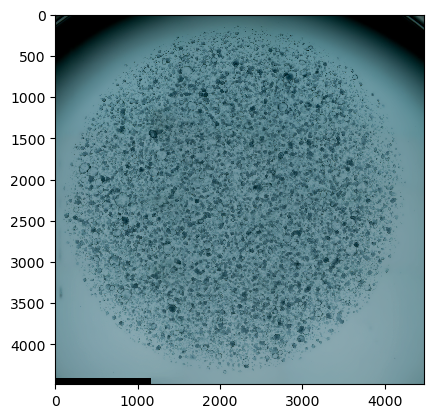

In [20]:
import cv2
import glob
%matplotlib inline
import matplotlib.pyplot as plt

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

image_paths = sorted([x for x in glob.glob(r"H:\EVOS\*.tif")])

stitcher = cv2.Stitcher_create(mode = 1)
#confidence of stitcher
stitcher.setPanoConfidenceThresh(0.5) 
# n = number of images taken per well
n = 12
number_of_wells = round(len(image_paths)/n)

list_of_well_paths = list(split(image_paths, number_of_wells))

for well_number, well_paths in enumerate(list_of_well_paths):
    well_images = []
    for image_path in well_paths:
        image = cv2.imread(image_path)
        well_images.append(image)

    status,result = stitcher.stitch((well_images))
    plt.imshow(result, cmap = 'gray')
    path = "H:/EVOS/stitched/well_" + str(well_number+1) + ".png"
    cv2.imwrite(path, result)